# Ford GoBike System Slide Deck
## by Ahmed Hbaieb


## Investigation Overview


During my analysis , I wanted to find which days days of the week have the highest volatility , what is the average duration per gender and user type and what were the distribution of all features and how the correlated .  

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

Features :

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)


In [26]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [27]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike_tripdata_clean.csv') 

## Trips taken through the week 

> It seems like people tend to take trips on Thursdays and rest on weekends 

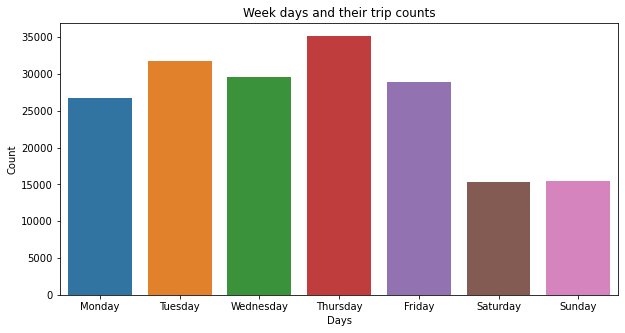

In [28]:
plt.figure(figsize = (10,5)) 
Day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sns.countplot( data = df , x = 'Day' , order=Day_order);
plt.xlabel('Days')
plt.ylabel('Count')
plt.title("Week days and their trip counts");

## Which Gender is more active ?

> It seems like people who identify as 'other' spend more time on their trips followed by Females and then Males  

<AxesSubplot:title={'center':'average trip duration per gender   '}, xlabel='duration in hours', ylabel='member_gender'>

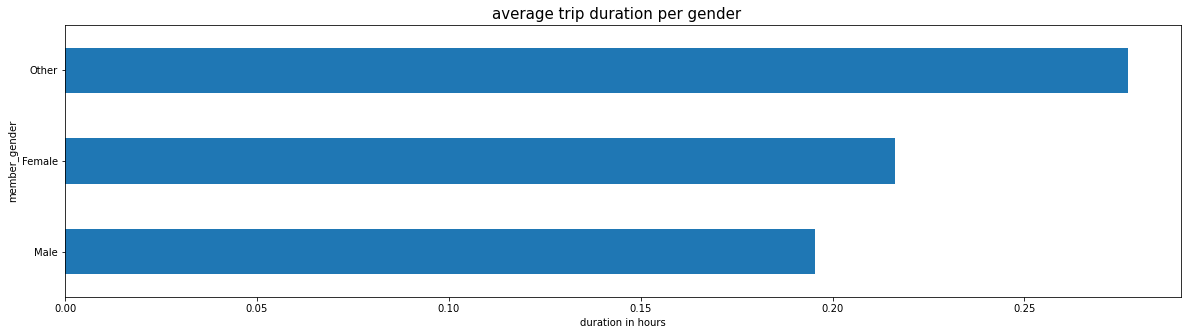

In [29]:
plt.figure(figsize = (20,5)) 
plt.title("average trip duration per gender   ", fontsize=15);
plt.xlabel('duration in hours')

df.groupby('member_gender')['duration_hours'].mean().sort_values(ascending=False).head()[3::-1].plot(kind='barh')

## Average trip duration for each Gender per day

> Most of the time Females tend to spend more on their trips but it is not always the case for Saturdays since Males tend to make an exception 

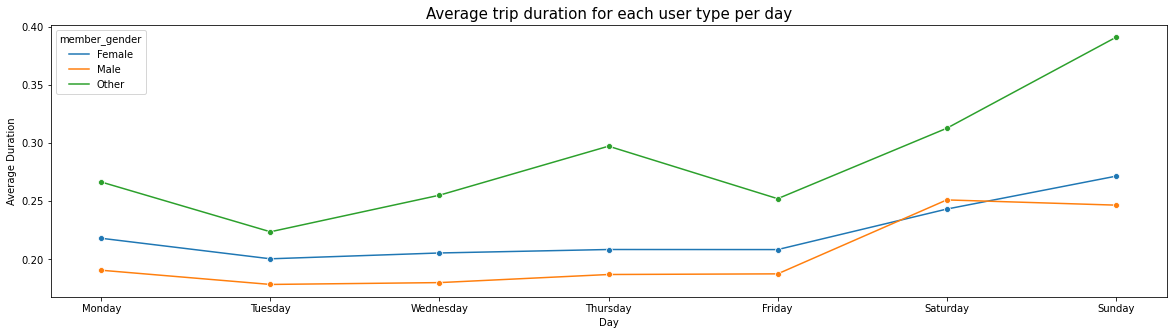

In [30]:
df['Day'] = pd.Categorical(df['Day'], categories=Day_order , ordered=True)

df_avg = df.groupby(['member_gender','Day']).duration_hours.mean()
df_avg = df_avg.reset_index()
# plot a line plot with colors based on user_type
plt.figure(figsize=[20,5])
sns.lineplot(data = df_avg, x='Day', y='duration_hours', hue='member_gender', marker='o')
plt.title("Average trip duration for each user type per day",fontsize = 15)
plt.ylabel('Average Duration');

## Which user spends the most time on his trips ?

> It seems like Customers tend to spend on average more time than Subscribers during these trips 

<AxesSubplot:title={'center':'average trip duration per user type   '}, xlabel='duration in hours', ylabel='user_type'>

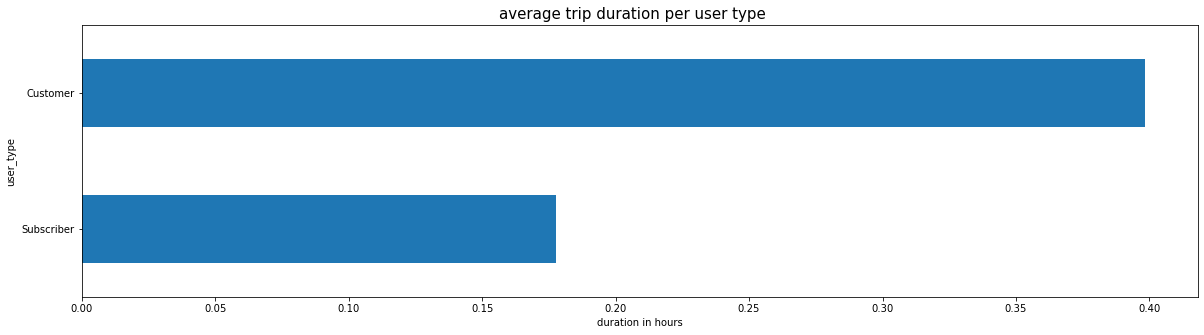

In [31]:
plt.figure(figsize = (20,5))    
plt.title("average trip duration per user type   ", fontsize=15);
plt.xlabel('duration in hours')

df.groupby('user_type')['duration_hours'].mean().sort_values(ascending=False).head()[2::-1].plot(kind='barh')

## What are the days where different user types are more active ? 

> Seems like customers prefer to attend trips on weekends more than the rest of the weekdays  



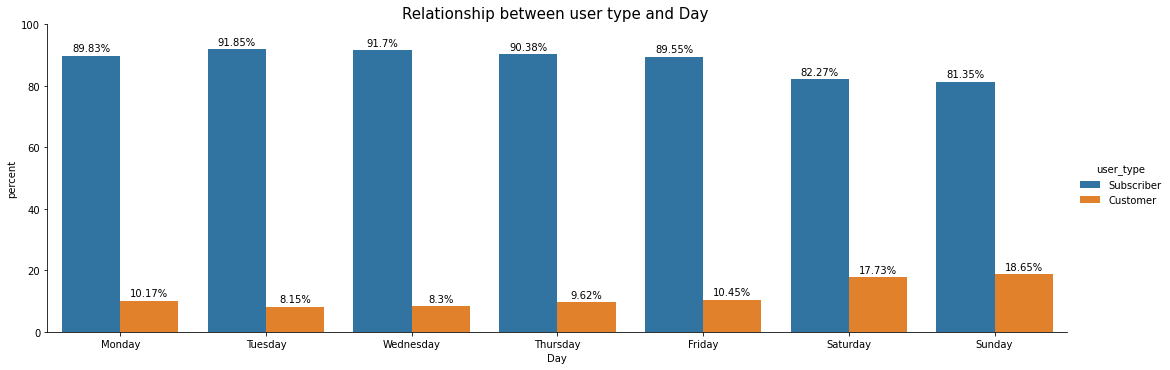

In [32]:
# function declaration for future purposes 
def categ_bar_pourcent(df_,x_,y_,aspect_ , Order = None ) : 
    x,y = x_, y_

    df1 = df_.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1 ,aspect=aspect_ , order=Order)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() + p.get_width()/2
        txt_y = p.get_height() +0.7
        g.ax.text(txt_x,txt_y,txt ,ha='center' , va='bottom' ) 

# order we will use for the future 
categ_bar_pourcent(df,'Day','user_type',3 , Order=Day_order) 
plt.title("Relationship between user type and Day " , fontsize=15);


## Average trip duration for each user type per day

> Customers represent the minority in our data , yet they still spend the most time on trips , specifically on weekends since they tend to be more presents in those 2 days 


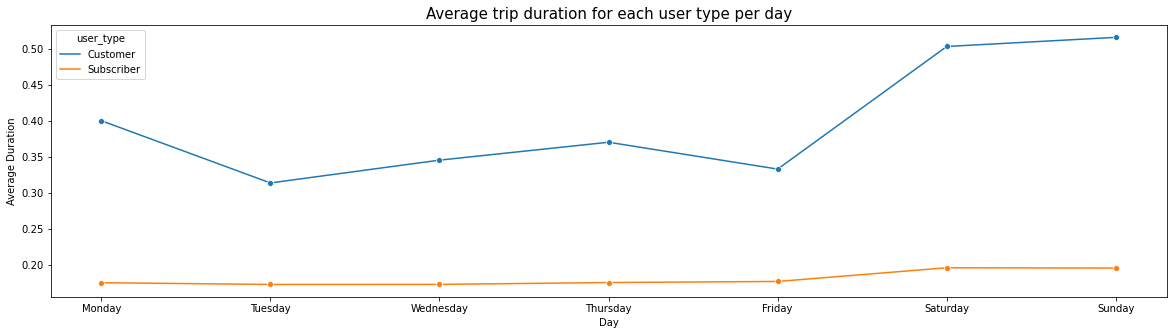

In [33]:
df['Day'] = pd.Categorical(df['Day'], categories=Day_order , ordered=True)

df_avg = df.groupby(['user_type','Day']).duration_hours.mean()
df_avg = df_avg.reset_index()
        
# plot a line plot with colors based on user_type
plt.figure(figsize=[20,5])
sns.lineplot(data = df_avg, x='Day', y='duration_hours', hue='user_type', marker='o')
plt.title("Average trip duration for each user type per day",fontsize = 15)
plt.ylabel('Average Duration'); 

In [34]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 744277 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\ahmed\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\ahmed\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\ahmed\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\ahmed\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\ahmed\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\ahmed\a